<a href="https://colab.research.google.com/github/AmenaEi/Team-11-Wotech/blob/main/Python/Class16Correlation_Lena.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pokemon_df = pd.read_csv('/content/Pokemon.csv') #it already create pandas dataframe

In [3]:
pokemon_df.head(n=5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


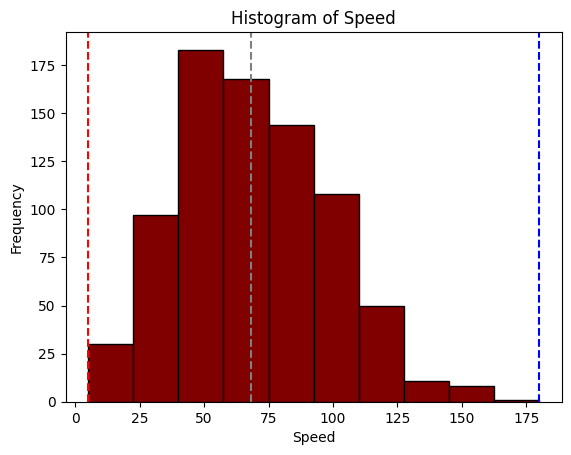

In [7]:
###Create histogram of column Speed

plt.hist(pokemon_df['Speed'], color='maroon', edgecolor='black')
plt.title('Histogram of Speed')
plt.xlabel('Speed')
plt.ylabel('Frequency')

#Add to your histogram min, max, mean (average) lines
#pokemon_df['Total'].mean() = average
plt.axvline(pokemon_df['Speed'].mean(), color='grey', linestyle='dashed')
#min line
plt.axvline(pokemon_df['Speed'].min(), color='red', linestyle='dashed')
#max line
plt.axvline(pokemon_df['Speed'].max(), color='blue', linestyle='dashed')

plt.show()

### Correlation

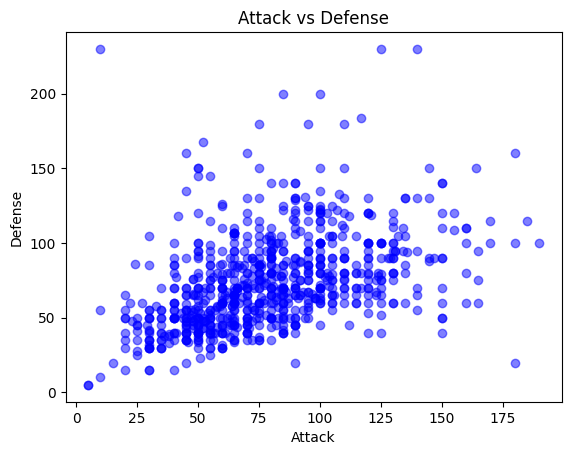

In [8]:
#Correlation shows to what extent 2 variables are linearly related.
#Correlation does not equal causation!
#If correlation increases - it's positive. If decreases - it's negative. If it's straight horizontal line - no correlation

#scatter plt (punktu izklaides diagramma) between variables: attack and defence
#alpha = transparency
plt.scatter(pokemon_df['Attack'], pokemon_df['Defense'], color = 'blue', alpha=0.5) #first x axis, then y axis?
plt.title('Attack vs Defense')
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.show()

#when attack increases, defense also increases

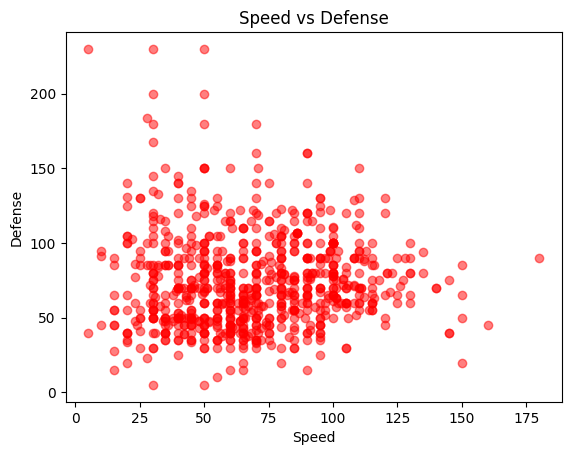

In [12]:
# Create scatter plot for variables Speed and Defense

plt.scatter(pokemon_df['Speed'], pokemon_df['Defense'], color = 'red', alpha=0.5)
plt.title('Speed vs Defense')
plt.xlabel('Speed')
plt.ylabel('Defense')
plt.show()

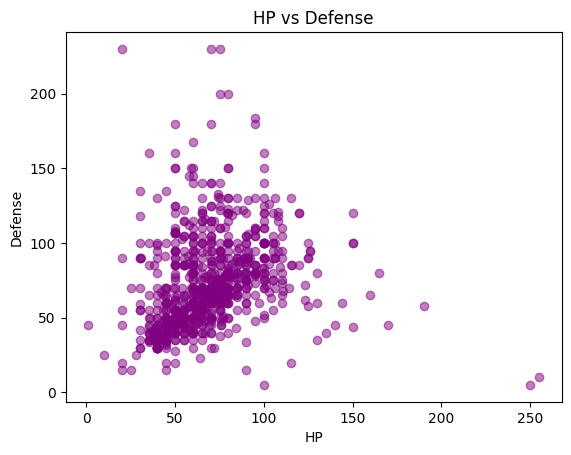

In [11]:
# scatterplot for variables: HP and Defense

plt.scatter(pokemon_df['HP'], pokemon_df['Defense'], color = 'purple', alpha=0.5)
plt.title('HP vs Defense')
plt.xlabel('HP')
plt.ylabel('Defense')
plt.show()

### Pearson correlation

The correlation coefficient indicates the strength and direction of the statistical relationship between two variables. The coefficient ranges from -1 to 1, with a value of 0.43 signifying a positive but moderately strong relationship between the two variables.

A positive correlation coefficient means that the variables increase together. Therefore, as one variable increases, the other also tends to increase, and vice versa.
The closer the correlation coefficient is to 1, the stronger the positive relationship.
A correlation coefficient of 0.43 is not very high, but it indicates a moderately positive relationship.
If the correlation coefficient were negative, it would suggest that as one variable increases, the other variable decreases.
A correlation coefficient of -1 indicates a perfect negative relationship.
Thus, a correlation coefficient of 0.43 might suggest that, for example, as Pokémon's Attack values increase, their Defense values tend to increase as well, but the relationship is not very strong.

In [15]:
# Result of this correlation calculation is between -1 and 1.
# -1 perfect negative relationship
# 1 perfect positive relationship

#Pearson correlation between Attack/Defense

correlation1 = pokemon_df['Attack'].corr(pokemon_df['Defense'])
print(correlation1)
#moderate positive correlation

0.4386870551184892


In [16]:
correlation2 = pokemon_df['Speed'].corr(pokemon_df['Defense'])
print(correlation2)
#

correlation3 = pokemon_df['HP'].corr(pokemon_df['Defense'])
print(correlation3)

0.015226598088597448
0.2396223188467258


In [21]:
# Select only numeric columns

numeric_columns = pokemon_df.select_dtypes(include=['number'])
numeric_columns = numeric_columns.drop('#', axis=1)
numeric_columns

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,318,45,49,49,65,65,45,1
1,405,60,62,63,80,80,60,1
2,525,80,82,83,100,100,80,1
3,625,80,100,123,122,120,80,1
4,309,39,52,43,60,50,65,1
...,...,...,...,...,...,...,...,...
795,600,50,100,150,100,150,50,6
796,700,50,160,110,160,110,110,6
797,600,80,110,60,150,130,70,6
798,680,80,160,60,170,130,80,6


In [24]:
target_column = 'Attack'
correlation_results = {}

for column in numeric_columns.columns:
    if column != target_column:     #to not try to find correlation btw Attack and Attack, cause it always be 1.
        correlation = pokemon_df[target_column].corr(pokemon_df[column])
        correlation_results[column] = correlation

print(f'The Pearsons Correlation between Attack and the other columns is as follows:')
for column, correlation in correlation_results.items():
  print(f'{column}: {correlation}')

The Pearsons Correlation between Attack and the other columns is as follows:
Total: 0.7362106519949293
HP: 0.422386028776223
Defense: 0.4386870551184892
Sp. Atk: 0.396361755349232
Sp. Def: 0.26398955110108846
Speed: 0.38123973924108967
Generation: 0.051451336708469686


### Correlation matrix

A correlation matrix is like a big table that helps you understand how different things are related to each other.

Imagine you have a bunch of numbers that describe different features of Pokémon, like their height, weight, speed, and strength. A correlation matrix shows you how these features move together.

####How It Works:
Rows and Columns: The matrix is a grid where each row and each column represents one of these features (like speed, height, etc.).

Values: Inside the grid, you have numbers that tell you how much two features are related:
* 1 means they are perfectly related. If one goes up, the other also goes up exactly the same way.
* -1 means they are perfectly opposite. If one goes up, the other goes down exactly the same way.
* 0 means they have no relation at all. Knowing one doesn't help you guess the other.

Example:
If you were to look at the correlation between "speed" and "weight" for Pokémon:

* If the number is 0.8, it means faster Pokémon tend to be heavier.
* If the number is -0.5, it means faster Pokémon tend to be lighter.
* If the number is 0, it means speed and weight don't seem to affect each other.

Why It's Useful:
A correlation matrix helps you quickly see which features are related and by how much. This can be useful if you're trying to understand patterns or make predictions!

In [53]:
correlation_matrix = numeric_columns.corr() #all columns are numeric
correlation_matrix

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
Total,1.000000,0.618748,0.736211,0.612787,0.747250,0.717609,0.575943,0.048384
HP,0.618748,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683
Attack,0.736211,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451
Defense,0.612787,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419
Sp. Atk,0.747250,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437
Sp. Def,0.717609,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486
Speed,0.575943,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121
Generation,0.048384,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000


###Visualizing with seaborn

In [27]:
import seaborn as sns

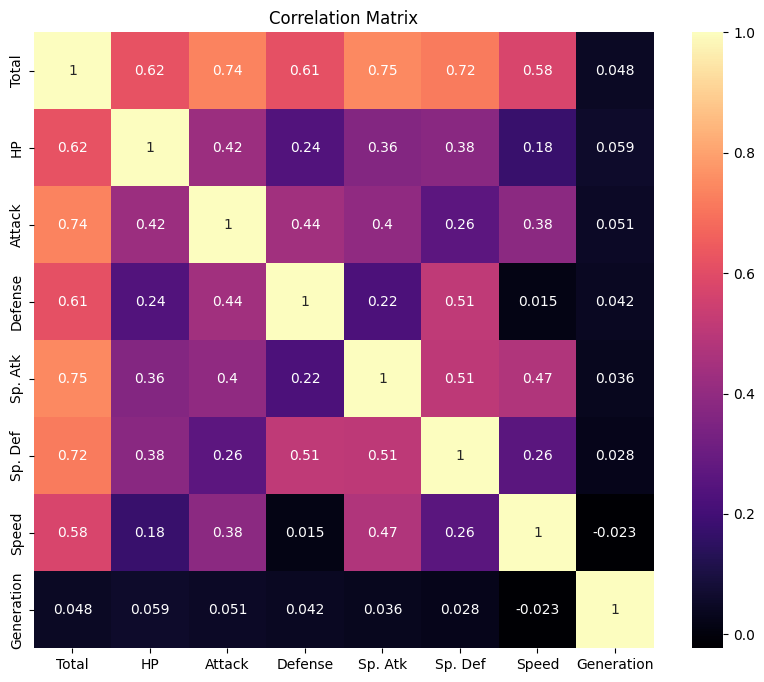

In [32]:
plt.figure(figsize=(10, 8)) #increase the size?
sns.heatmap(correlation_matrix, annot=True, cmap='magma') #annotation adding values
plt.title('Correlation Matrix')
plt.show()

###Linear regression

Linear regression is like trying to draw the best straight line through a bunch of points on a graph.

Imagine This:
You have a bunch of dots on a piece of paper, where each dot shows how much candy you ate and how happy you felt afterward. The more candy you ate, the happier you felt, but the dots aren't perfectly lined up—they're a little scattered.

###What Linear Regression Does:
* Drawing a Line: Linear regression finds the best straight line that goes through these dots. This line is called the "regression line."
* Why a Line? Because a line can show a simple relationship—like "If I eat more candy, I usually feel happier."

###How It Helps:
* Prediction: Once you have this line, you can predict things. For example, if you ate a certain amount of candy, you could use the line to guess how happy you might be.
* Understanding Relationships: The line also helps you see how strong the relationship is between eating candy and being happy. If the line is very steep, it means that eating more candy makes you a lot happier. If it’s flat, it means candy doesn’t change your happiness much.

###Key Points:
* The Line: Shows the trend or pattern in your data.
* Prediction: You can use the line to make guesses about new data.
* Simple Relationship: It’s called "linear" because it's a straight line, which is the simplest way to show how two things are connected.
So, linear regression is like drawing a line to understand and predict how two things are related!

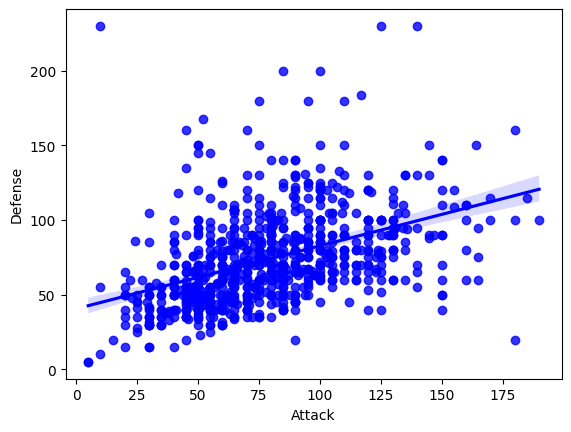

In [34]:
sns.regplot(x = 'Attack', y = 'Defense', data = pokemon_df, color = 'blue')
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.show()

Text(0.5, 1.0, 'Attack vs Defense')

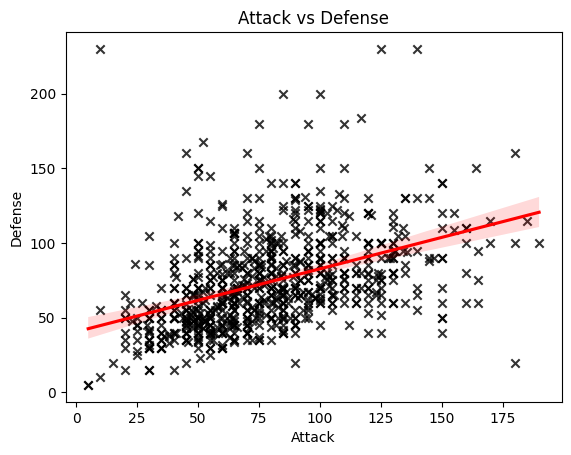

In [38]:
sns.regplot(x='Attack', y='Defense', data=pokemon_df, color='black', ci=99, marker='x', line_kws={'color':'red'})
plt.title('Attack vs Defense')

Text(0.5, 1.0, 'Speed vs Defense')

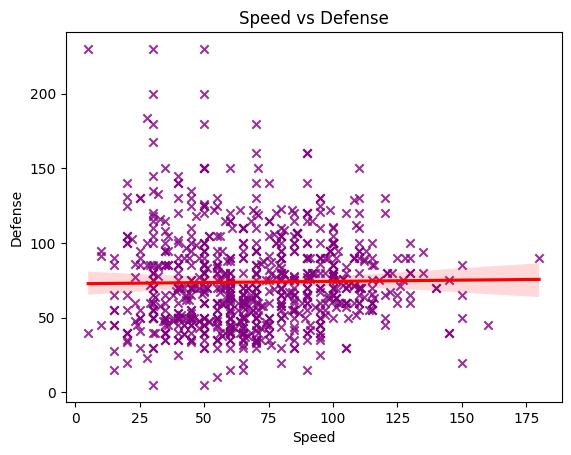

In [40]:
'''
In the sns.regplot function from the Seaborn library, the ci parameter stands for "confidence interval."
The confidence interval represents the range within which the true regression line is expected to fall,
with a specified level of confidence. The value ci=99 means that the plot will display a 99% confidence
interval for the regression line.

A 50% CI indicates that, based on the data, there is a 50% chance that this interval contains
the true regression line. It reflects our confidence in where the true regression line is likely to be,
not the probability of a new observation falling within this interval.
'''

sns.regplot(x='Speed', y='Defense', data=pokemon_df, color='purple', ci=99, marker='x', line_kws={'color':'red'})
plt.title('Speed vs Defense')


## Group task

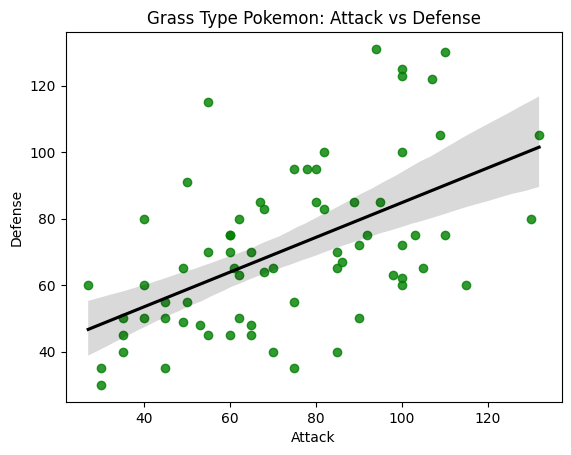


Pearson correlation between Attack and Defense for Grass type Pokémon: 0.54


In [64]:
'''
Task: Visualizing the correlation of Attack and Defense variables of two Types: Grass and Water Type 1 Pokémon.
1. Create two DataFrame Grass and Water
2. Create the regression plots for each (Grass and Water)
3. Calculate the Pearson correlation for each DataFrame (variables: Attack and Defense)
4. Explain to each other what do you see and what it means.
'''

type_grass_df = pokemon_df[pokemon_df['Type 1'] == 'Grass']
type_water_df = pokemon_df[pokemon_df['Type 1'] == 'Water']

#Regression plot for Grass Type
sns.regplot(x='Attack', y='Defense', data=type_grass_df, scatter_kws={'color':'green'}, line_kws={'color':'black'})
plt.title('Grass Type Pokemon: Attack vs Defense')
plt.show()

#Pearson correlation for Grass Type
water_corr = type_grass_df['Attack'].corr(type_water_df['Defense'])
print()
print(f'Pearson correlation between Attack and Defense for Grass type Pokémon: {grass_corr:.2f}')

# Positive but moderately strong relationship

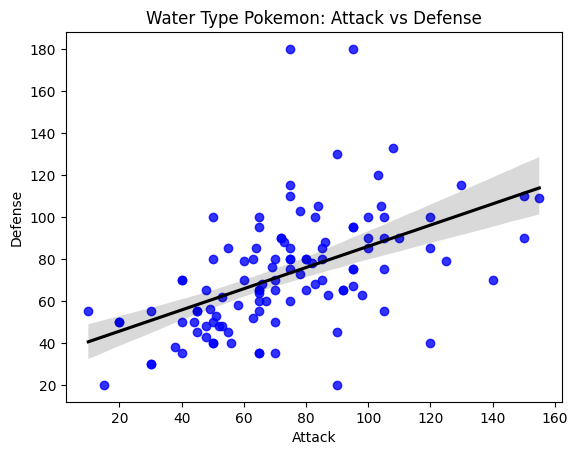


Pearson correlation between Attack and Defense for Water type Pokemon: 0.52


In [65]:
#Regression plot for Water Type

sns.regplot(x='Attack', y='Defense', data=type_water_df, scatter_kws={'color':'blue'}, line_kws={'color':'black'})
plt.title('Water Type Pokemon: Attack vs Defense')
plt.show()

#Pearson correlation for Water Type

'''
Can also be done differently:
water_corr = type_water_df[['Attack', 'Defense']].corr().loc['Attack', 'Defense']

What It Does:
- Creates a Correlation Matrix: This method first computes a full
correlation matrix for the selected columns (Attack and Defense),
which shows the correlations between each pair of columns.
- Accesses a Specific Value: After creating the matrix,
it uses .loc['Attack', 'Defense'] to extract the specific correlation
value between Attack and Defense.

This also gives you the correlation between Attack and Defense,
but does so by first generating a correlation matrix.

Double Brackets [[ ]]:
When you use double brackets, like type_water_df[['Attack', 'Defense']],
you are selecting multiple columns.
This returns a DataFrame with just the specified columns.

Summary of Differences:

- Direct Method (Water['Attack'].corr(Water['Defense'])):

    * Directly calculates the correlation between Attack and Defense.
    * Simpler and more efficient if you're only interested in the
relationship between two columns.

- Matrix Method (Water[['Attack', 'Defense']].corr().loc['Attack', 'Defense']):

    * First generates a correlation matrix for all selected columns.
    * Useful if you might need correlations between multiple pairs of columns,
    as it calculates all correlations at once and then extracts the one you need.
'''

water_corr = type_water_df['Attack'].corr(type_water_df['Defense'])
print()
print(f'Pearson correlation between Attack and Defense for Water type Pokemon: {water_corr:.2f}')

#Positive but moderately strong relationship

#What 0.52 Specifically Means:
    #Positive Relationship: The number 0.52 is positive, so there is a positive relationship.
#This means that as Attack increases, Defense tends to increase as well, but not perfectly.
    #Moderate Correlation: 0.52 is not very close to 1, so it’s a moderate relationship.
#Attack and Defense are somewhat related, but there are other factors affecting
#Defense that aren't captured by Attack alone.

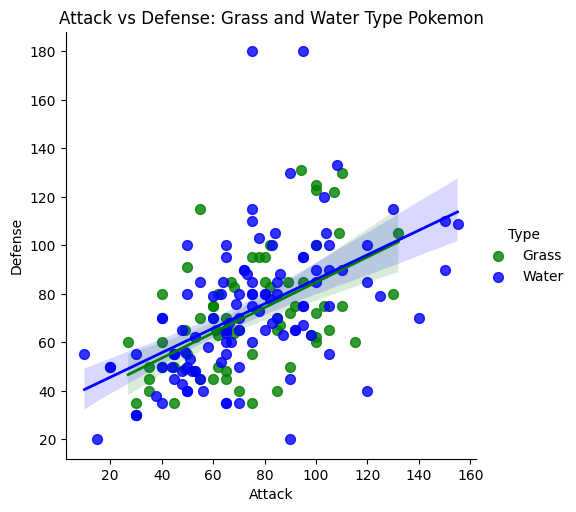

In [66]:
#option in seaborn to visualize two regressions in the same visualization

type_grass_df = pokemon_df[pokemon_df['Type 1'] == 'Grass'].copy()
type_grass_df['Type'] = 'Grass'

type_water_df = pokemon_df[pokemon_df['Type 1'] == 'Water'].copy()
type_water_df['Type'] = 'Water'

'''
Using .copy() ensures that you're working with a separate DataFrame,
which avoids potential issues with modifying views. This practice is
particularly important when you need to ensure that changes do not
inadvertently affect other parts of your DataFrame or result in
unexpected behavior.
'''

#Concatenate the two DataFrames into a single DataFrame called combined_df
combined_df = pd.concat([type_grass_df, type_water_df])

# Regression plot with hue to differentiate between Grass and Water

'''
Using sns.lmplot():
    * x='Attack', y='Defense': Specifies the variables for the x-axis and y-axis.
    * hue='Type': Differentiates the data points and regression lines by Pokémon type (Grass or Water).
    * palette={'Grass': 'green', 'Water': 'blue'}: Specifies the colors to use for each type.
    * scatter_kws={'s': 50}: Controls the size of the scatter points.
    * line_kws={'lw': 2}: Controls the width of the regression lines.

lmplot: Similar to regplot, but can handle multiple plots at once,
like plotting different groups in different colors or multiple regression lines
in one plot. It's more flexible and can handle more complex cases.
'''

sns.lmplot(x='Attack', y='Defense', hue='Type', data=combined_df,
           palette={'Grass': 'green', 'Water': 'blue'},
           scatter_kws={'s': 50}, line_kws={'lw': 2})

plt.title('Attack vs Defense: Grass and Water Type Pokemon')
plt.show()